Homework - Adishree Sane, 702207239

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adiun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adiun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adiun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adiun\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adiun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [4]:
#Task1
import pandas as pd
import os

# Function to load all text files from a given directory structure
def load_reviews(base_path, label, polarity):
    reviews = []
    if not os.path.exists(base_path):
        print(f"Path not found: {base_path}")
        return reviews
    
    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if os.path.isdir(category_path):
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='utf-8') as file:
                        reviews.append({
                            "review": file.read().strip(),
                            "label": label,
                            "polarity": polarity,
                            "source": category
                        })
    return reviews

# **Fix the path** - If in Downloads
dataset_path = os.path.expanduser("~/Downloads/op_spam_v1.4")

# Check if path exists before proceeding
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Check your path!")

negative_polarity_path = os.path.join(dataset_path, "op_spam_v1.4/negative_polarity")
positive_polarity_path = os.path.join(dataset_path, "op_spam_v1.4/positive_polarity")

# Load reviews from all categories
negative_deceptive = load_reviews(os.path.join(negative_polarity_path, "deceptive_from_MTurk"), "deceptive", "negative")
negative_truthful = load_reviews(os.path.join(negative_polarity_path, "truthful_from_Web"), "truthful", "negative")
positive_deceptive = load_reviews(os.path.join(positive_polarity_path, "deceptive_from_MTurk"), "deceptive", "positive")
positive_truthful = load_reviews(os.path.join(positive_polarity_path, "truthful_from_TripAdvisor"), "truthful", "positive")

# Combine all reviews into a DataFrame
review_data = pd.DataFrame(negative_deceptive + negative_truthful + positive_deceptive + positive_truthful)

# Save as CSV file
review_data.to_csv("review_data.csv", index=False)

# Display the first few rows
print("Dataset loaded successfully!")
review_data.head()


Dataset loaded successfully!


,review,label,polarity,source
0,We stayed at the Schicago Hilton for 4 days an...,deceptive,negative,fold1
1,Hotel is located 1/2 mile from the train stati...,deceptive,negative,fold1
2,I made my reservation at the Hilton Chicago be...,deceptive,negative,fold1
3,"When most people think Hilton, they think luxu...",deceptive,negative,fold1
4,My husband and I recently stayed stayed at the...,deceptive,negative,fold1


In [5]:
#Task2
review_data["review_ID"] = range(1, len(review_data) + 1)
review_data.to_csv("review_data_with_ID.csv", index=False)
print("Added review_ID column successfully!")


Added review_ID column successfully!


In [6]:
#Task3
review_data["hotel_review_length"] = review_data["review"].apply(lambda x: len(str(x).split()))
hotel_review_length = review_data[["review_ID", "hotel_review_length"]]
hotel_review_length.to_csv("hotel_review_length.csv", index=False)
print("Created hotel_review_length dataset successfully!")


Created hotel_review_length dataset successfully!


In [7]:
#Task4
import pandas as pd
from nltk.corpus import stopwords

# Load dataset
ds = pd.read_csv("review_data.csv")

# Define stop words set
stop_words = set(stopwords.words('english'))

# Apply stop word removal using lambda function
ds['review'] = ds['review'].apply(lambda x: ' '.join([word for word in str(x).lower().split() if word not in stop_words]))

# Save dataset
ds.to_csv("data_without_stop.csv", index=False)

print("Stop words removed and saved as 'data_without_stop.csv'.")


Stop words removed and saved as 'data_without_stop.csv'.


In [8]:
#Task5
ds['review'] = ds['review'].apply(lambda x: re.sub(r'\d+', '', x))
ds.to_csv("new_without_numbers.csv", index=False)
print("Numbers removed and saved as 'new_without_numbers.csv'.")

Numbers removed and saved as 'new_without_numbers.csv'.


In [9]:
#Task6
lemmatizer = WordNetLemmatizer()
ds['review'] = ds['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
ds.to_csv("review_lemmatized.csv", index=False)
print("Lemmatized text and saved as 'review_lemmatized.csv'.")

Lemmatized text and saved as 'review_lemmatized.csv'.


In [10]:
#Task7
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(ds['review'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.to_csv("tfidf_vectors.csv", index=False)
print("TF-IDF vectors saved as 'tfidf_vectors.csv'.")


TF-IDF vectors saved as 'tfidf_vectors.csv'.


In [11]:
#Task8
all_words = ' '.join(ds['review']).split()
word_counts = Counter(all_words)
top_10_words = word_counts.most_common(10)
print("Top 10 most common words:", top_10_words)

Top 10 most common words: [('hotel', 2739), ('room', 2661), ('stay', 1073), ('chicago', 973), ('would', 908), ('staff', 722), ('great', 697), ('stayed', 657), ('one', 646), ('service', 637)]


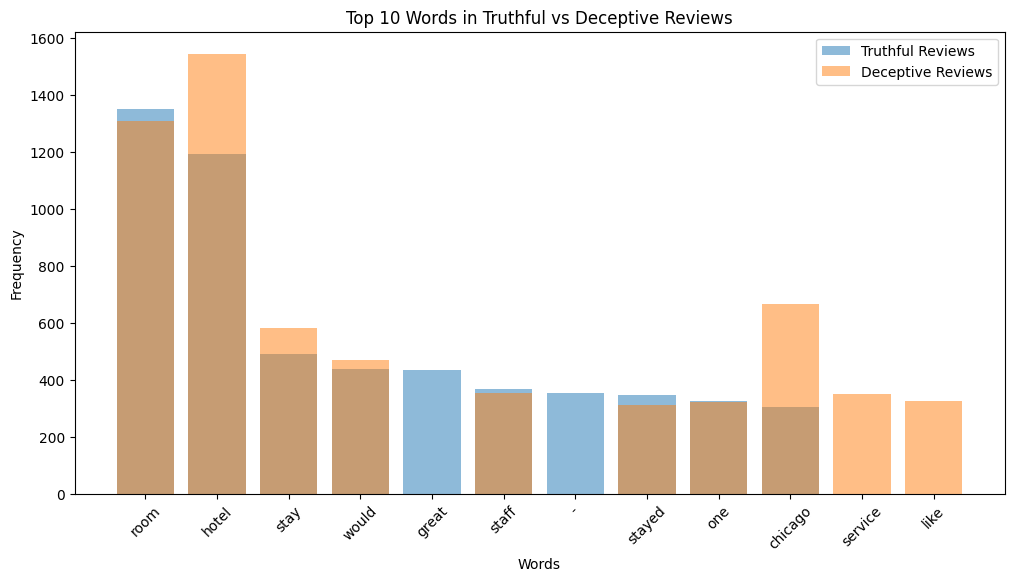

In [12]:
#Task9
original_ds = pd.read_csv("review_data.csv")
original_ds['review'] = ds['review']
truthful_reviews = original_ds[original_ds['label'] == 'truthful']
deceptive_reviews = original_ds[original_ds['label'] == 'deceptive']

truthful_word_counts = Counter(' '.join(truthful_reviews['review']).split())
deceptive_word_counts = Counter(' '.join(deceptive_reviews['review']).split())

truthful_top_10 = truthful_word_counts.most_common(10)
deceptive_top_10 = deceptive_word_counts.most_common(10)

truthful_words, truthful_freqs = zip(*truthful_top_10)
deceptive_words, deceptive_freqs = zip(*deceptive_top_10)

plt.figure(figsize=(12, 6))
plt.bar(truthful_words, truthful_freqs, alpha=0.5, label='Truthful Reviews')
plt.bar(deceptive_words, deceptive_freqs, alpha=0.5, label='Deceptive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Truthful vs Deceptive Reviews')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Task 10

a. What does the plot tell us?
Sincere reviews use more specific words about real experiences.
Fake reviews have either generic, extremely positive, or superlative words that sound real but aren't.

b. How do we identify phony reviews?
approach- Convert words to numbers with TF-IDF or word embeddings with models such as Word2Vec, BERT.
Train a model like Logistic Regression, Random Forest, or Deep Learning such as LSTMs, BERT.
Accuracy is improved by adding review length, sentiment, and metadata.

c. How do we know if it works?
Precision & Recall methods evaluate the ability to detect fake reviews.
F1-score & ROC-AUC verify overall model performance.
Cross-validation validates the model for new data.